# Hackathon - EDA & Cleaning

Notebook that shows cleaning and EDA on half of the original dataset, work split with John Wertz.

Magnus Bigelow

## Contents

- [Important Functions](#Important-Functions)
- [High Level EDA](#Read-in-data-&-High-Level-Stats)
- [EDA on 2nd Half of Columns](#EDA-on-2nd-Half-of-Columns)
- [Occupation](#Occupation)
- [Relationship](#Relationship)
- [Sex](#Sex)
- [Capital-Gain](#Capital-Gain)
- [Capital-Loss](#Capital-Loss)
- [Hours Worked](#Hours-Worked)
- [Native Country](#Native-Country)
- [Save to CSV](#Save-to-CSV)
- [Train Data](#Train-Data)

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Important Functions

In [3]:
# t-tests to see if given category's values are significant
def cat_tt(df, col, y, a = 0.05):
    # list of unique strings in the column
    unique = df[col].unique()
    # print H_0 and H_A
    print(f'h_0: mean {y} given {col} = x == mean {y} given {col} != x. \n')
    print(f'h_a: mean {y} given {col} = x != mean {y} given {col} != x. \n')
    print(f'Significance level of {a}\n\n')
    # loop through each unique string
    for cat in unique:
        # create control that is everything but that string
        # trt that is that string for mean of df[y]
        ctrl = df.loc[df[col]!=cat,y]
        trt = df.loc[df[col]==cat,y]
        # create t test
        tt = stats.ttest_ind(trt,ctrl,equal_var=False)
        # using alpha of 0.05 determine if 
        # y values for given categorical string are
        # significantly different from others
        if tt.pvalue < a:
            print(f'For {cat} reject h_0: p-value of {tt.pvalue}')
        else:
            print(f'For {cat} Fail to reject h_0: p-value of {tt.pvalue}')

In [4]:
# t-tests to see if given category's values are significant
def cat_mean_median(df, col, y):
    # list of unique strings in the column
    unique = df[col].unique()
    for cat in unique:
        # Get mean and median y
        print(f'Mean {y} given {col} == {cat}: {np.round(df[df[col] == cat][y].mean(),3)}')
        print(f'Median {y} given {col} == {cat}: {np.round(df[df[col] == cat][y].median(),3)}\n')

## Read In Data & High Level Stats

In [5]:
df = pd.read_csv('../data/large_train_sample.csv')

In [6]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [7]:
df.shape

(32561, 14)

In [8]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
wage              object
dtype: object

In [9]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
wage              0
dtype: int64

No null values

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


### EDA on 2nd Half of Columns

In [10]:
df = df[['occupation','relationship','sex','capital-gain','capital-loss','hours-per-week','native-country','wage']]

In [11]:
df.head()

,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country,wage
0,Adm-clerical,Not-in-family,Male,2174,0,40,United-States,<=50K
1,Exec-managerial,Husband,Male,0,0,13,United-States,<=50K
2,Handlers-cleaners,Not-in-family,Male,0,0,40,United-States,<=50K
3,Handlers-cleaners,Husband,Male,0,0,40,United-States,<=50K
4,Prof-specialty,Wife,Female,0,0,40,Cuba,<=50K


In [12]:
df['wage'].value_counts()

 <=50K    24720
 >50K      7841
Name: wage, dtype: int64

In [13]:
# First convert 'wage' to binary 0 = <50k, 1>50k
df['wage'] = df['wage'].map({' <=50K':0,' >50K':1})
df['wage'].value_counts()

0    24720
1     7841
Name: wage, dtype: int64

#### Occupation

In [14]:
# Look at variables and value counts
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

Have very few armed forces but otherwise a pretty good number of each occupation. Need to look further into '?' and how that translates across the dataset

In [15]:
# Look at whether the mean wage is significantly different for each occupation
cat_tt(df,'occupation','wage')

h_0: mean wage given occupation = x == mean wage given occupation != x. 

h_a: mean wage given occupation = x != mean wage given occupation != x. 

Significance level of 0.05


For  Adm-clerical reject h_0: p-value of 4.34997206421731e-83
For  Exec-managerial reject h_0: p-value of 2.3387874767759288e-226
For  Handlers-cleaners reject h_0: p-value of 3.6281815223797586e-131
For  Prof-specialty reject h_0: p-value of 7.192254114663988e-176
For  Other-service reject h_0: p-value of 0.0
For  Sales reject h_0: p-value of 3.56383202395801e-05
For  Craft-repair reject h_0: p-value of 0.020914972616090727
For  Transport-moving reject h_0: p-value of 3.904013355569732e-05
For  Farming-fishing reject h_0: p-value of 5.2437083029024904e-33
For  Machine-op-inspct reject h_0: p-value of 5.64573237099448e-54
For  Tech-support reject h_0: p-value of 1.776147482518739e-05
For  ? reject h_0: p-value of 2.2820676164668833e-77
For  Protective-serv reject h_0: p-value of 4.273714225996773e-06
For  Armed-

In [16]:
# Look at mean and median wage by occupation
cat_mean_median(df,'occupation','wage')

Mean wage given occupation ==  Adm-clerical: 0.134
Median wage given occupation ==  Adm-clerical: 0.0

Mean wage given occupation ==  Exec-managerial: 0.484
Median wage given occupation ==  Exec-managerial: 0.0

Mean wage given occupation ==  Handlers-cleaners: 0.063
Median wage given occupation ==  Handlers-cleaners: 0.0

Mean wage given occupation ==  Prof-specialty: 0.449
Median wage given occupation ==  Prof-specialty: 0.0

Mean wage given occupation ==  Other-service: 0.042
Median wage given occupation ==  Other-service: 0.0

Mean wage given occupation ==  Sales: 0.269
Median wage given occupation ==  Sales: 0.0

Mean wage given occupation ==  Craft-repair: 0.227
Median wage given occupation ==  Craft-repair: 0.0

Mean wage given occupation ==  Transport-moving: 0.2
Median wage given occupation ==  Transport-moving: 0.0

Mean wage given occupation ==  Farming-fishing: 0.116
Median wage given occupation ==  Farming-fishing: 0.0

Mean wage given occupation ==  Machine-op-inspct: 0.1

Consider grouping them into buckets based on mean wage.

#### Relationship

In [17]:
# Look at variables and value counts
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [18]:
# Look at mean and median wage by occupation
cat_mean_median(df,'relationship','wage')

Mean wage given relationship ==  Not-in-family: 0.103
Median wage given relationship ==  Not-in-family: 0.0

Mean wage given relationship ==  Husband: 0.449
Median wage given relationship ==  Husband: 0.0

Mean wage given relationship ==  Wife: 0.475
Median wage given relationship ==  Wife: 0.0

Mean wage given relationship ==  Own-child: 0.013
Median wage given relationship ==  Own-child: 0.0

Mean wage given relationship ==  Unmarried: 0.063
Median wage given relationship ==  Unmarried: 0.0

Mean wage given relationship ==  Other-relative: 0.038
Median wage given relationship ==  Other-relative: 0.0



Consider grouping by \['husband','wife'] or other

#### Sex

In [19]:
# Look at value counts
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

2/3 male in the dataset, let's make this a dummy with male == 1

In [20]:
df['sex'] = df['sex'].map({' Male':1,' Female':0})

In [21]:
df['sex'].value_counts()

1    21790
0    10771
Name: sex, dtype: int64

In [22]:
# Look at mean and median wage by sex
cat_mean_median(df,'sex','wage')

Mean wage given sex == 1: 0.306
Median wage given sex == 1: 0.0

Mean wage given sex == 0: 0.109
Median wage given sex == 0: 0.0



#### Capital-Gain

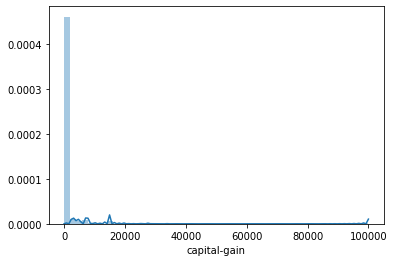

In [23]:
# Histogram of capital gain
sns.distplot(df['capital-gain']);

Looks like almost all people have 0 capital gains, perhaps should be converted to binary of have capital gain or not.

In [24]:
df[['capital-gain','wage']].corr()

,capital-gain,wage
capital-gain,1.000000,0.223329
wage,0.223329,1.000000


In [25]:
# Create binary columns
df['cap_gain_binary'] = np.where(df['capital-gain'] > 0, 1, 0)

In [26]:
# Look at new correlation
df[['cap_gain_binary','wage']].corr()

,cap_gain_binary,wage
cap_gain_binary,1.000000,0.266162
wage,0.266162,1.000000


That made for an even stronger correlation and will simplify the model. It also makes sense that people with capital gains have a higher income as you need to have extra money in order to invest in the stock-market

In [27]:
df[df['cap_gain_binary'] == 1]['wage'].mean()

0.6183628318584071

#### Capital-Loss

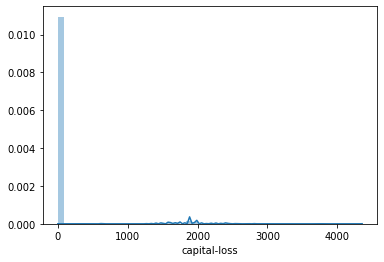

In [28]:
# Histogram of capital loss
sns.distplot(df['capital-loss']);

Once again there are very few people with any sort of capital losses.

In [29]:
df[['capital-loss','wage']].corr()

,capital-loss,wage
capital-loss,1.000000,0.150526
wage,0.150526,1.000000


There is once again a correlation between capital loss and wage. This is expected for the same reason as with capital gains. In order to lose money on capital you need excess capital in the first place.

In [30]:
# Try the same binary conversion
df['cap_loss_binary'] = np.where(df['capital-loss'] > 0, 1, 0)

In [31]:
# Look at new correlation
df[['cap_loss_binary','wage']].corr()

,cap_loss_binary,wage
cap_loss_binary,1.000000,0.138692
wage,0.138692,1.000000


In this case the conversion made the correlation weaker, from 0.15 to 0.14.

#### Hours Worked

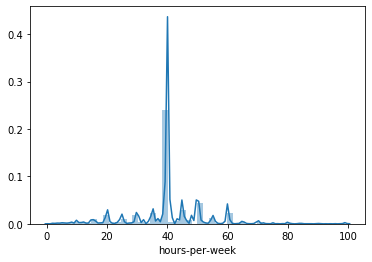

In [32]:
# Histogram of hours worked
sns.distplot(df['hours-per-week']);

Vast majority at 40 with a fairly even distribution to either side with spikes at each 5 hours.

In [34]:
# Look at new correlation
df[['hours-per-week','wage']].corr()

,hours-per-week,wage
hours-per-week,1.000000,0.229689
wage,0.229689,1.000000


This is a pretty good correlation compared to some of our variables, definitely worth putting in the model.

#### Native Country

In [33]:
# Value-counts and nunique
print(df['native-country'].nunique())
df['native-country'].value_counts()

42


 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

We have 42 unique countries, given our constraints of 20 features we can't dummy each of the countries. Instead we are going to map GDP Per Capita figures from the World Bank to each country as of 1996 (when the dataset was created) in order to get a good estimate of each countries average wage per citizen in our model. While median wage would be ideal, we weren't able to easily find that data and given time constraints this should be a good estimate.

[GDP Source](https://www.kaggle.com/sdorius/globses)

In [34]:
# Thanks Gil Baggio for help with utf-8 error
# https://stackoverflow.com/questions/18171739/unicodedecodeerror-when-reading-csv-file-in-pandas-with-python
wages = pd.read_csv('../data/GLOB_SES.csv', engine='python')
wages.head()

,unid,wbid,country,year,SES,gdppc,yrseduc,popshare
0,4,AFG,Afghanistan,1970,3.474212,709.00000,NaN,0.003097
1,4,AFG,Afghanistan,1920,26.968016,731.75677,NaN,0.003245
2,4,AFG,Afghanistan,1990,1.269530,604.00000,NaN,0.002347
3,4,AFG,Afghanistan,1960,15.763076,739.00000,NaN,0.003039
4,4,AFG,Afghanistan,2000,2.061114,565.00000,NaN,0.003309


In [35]:
# Only need 'gdppc', 'year' and 'country' columns'
wages = wages[['country','year','gdppc']]

In [36]:
# what years do we have?
wages['year'].value_counts()

2010    149
2000    149
1990    149
1980    149
1970    149
1960    149
1950    149
1940    149
1930    149
1920    149
1910    149
1900    149
1890    149
1880    149
Name: year, dtype: int64

In [37]:
# We only have every decade so let's take the mean of 1990 and 2000
# to approximate 1996
wages = wages[wages['year'].isin([1990,2000])]

In [38]:
wages['year'].value_counts()

2000    149
1990    149
Name: year, dtype: int64

In [39]:
wages['country']

2        Afghanistan
4        Afghanistan
21            Angola
22            Angola
31           Albania
            ...     
2057    South Africa
2061          Zambia
2066          Zambia
2079        Zimbabwe
2083        Zimbabwe
Name: country, Length: 298, dtype: object

In [40]:
# Get unique countries from original data frame
countries = df['native-country'].unique()
countries

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [41]:
# Go through and replace leading spaces with nothing
# remove -
for i in range(0,len(countries)):
    countries[i] = countries[i].strip()
    countries[i] = countries[i].replace('-',' ')
countries

array(['United States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican Republic', 'El Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying US(Guam USVI etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand Netherlands'], dtype=object)

In [42]:
# How many match our wages df
i = 1
same_countries = []
for country in countries:
    if country in wages['country'].unique():
        same_countries.append(country)
        print(country)
        i += 1
        
print(i)

United States
Cuba
Jamaica
India
Mexico
Honduras
Canada
Germany
Iran
Philippines
Italy
Poland
Cambodia
Thailand
Ecuador
Haiti
Portugal
Dominican Republic
El Salvador
France
Guatemala
China
Japan
Peru
Greece
Nicaragua
Vietnam
Ireland
Hungary
30


Unfortunately only 30 of our countries match, let's try to fix those first then manually fix the others.

In [43]:
# Which ones aren't in countries
i = 1
diff_countries = []
for country in countries:
    if not country in wages['country'].unique():
        same_countries.append(country)
        print(country)
        i += 1
        
print(i)

?
South
Puerto Rico
England
Columbia
Laos
Taiwan
Yugoslavia
Outlying US(Guam USVI etc)
Scotland
Trinadad&Tobago
Hong
Holand Netherlands
14


In [44]:
# First do the same strip and replace method to our
# countries column in the data set
# Holand - Netherlands to just Netherlands
# England / Scotland to United Kingdom 
# Columbia with Colombia
# Laos with Lao
for i in range(0,len(df['native-country'])):
    df['native-country'][i] = df['native-country'][i].strip()
    df['native-country'][i] = df['native-country'][i].replace('-',' ')
    df['native-country'][i] = df['native-country'][i].replace('Holand ','')
    df['native-country'][i] = df['native-country'][i].replace('England','United Kingdom')
    df['native-country'][i] = df['native-country'][i].replace('Scotland','United Kingdom')
    df['native-country'][i] = df['native-country'][i].replace('Columbia','Colombia')
    df['native-country'][i] = df['native-country'][i].replace('Laos','Lao')


/Users/magnusbigelow/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/magnusbigelow/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/magnusbigelow/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http

In [45]:
# Get unique countries from original data frame
countries = df['native-country'].unique()

# How many match our wages df
i = 1
same_countries = []
for country in countries:
    if country in wages['country'].unique():
        same_countries.append(country)
        print(country)
        i += 1
        
print(i)

# Which ones aren't in countries
i = 1
diff_countries = []
for country in countries:
    if not country in wages['country'].unique():
        same_countries.append(country)
        print(country)
        i += 1
        
print(i)

United States
Cuba
Jamaica
India
Mexico
Honduras
United Kingdom
Canada
Germany
Iran
Philippines
Italy
Poland
Colombia
Cambodia
Thailand
Ecuador
Lao
Haiti
Portugal
Dominican Republic
El Salvador
France
Guatemala
China
Japan
Peru
Greece
Nicaragua
Vietnam
Ireland
Hungary
Netherlands
34
?
South
Puerto Rico
Taiwan
Yugoslavia
Outlying US(Guam USVI etc)
Trinadad&Tobago
Hong
9


In [46]:
# Now let's loop through those unique values and 
# create a a dictionary of country - value pairs
gdp_dict = {}
for country in same_countries:
    gdp_dict[country] = wages[wages['country'] == country]['gdppc'].mean()

In [62]:
# Set Yugoslavia as mean of croatia, slovenia, serbia
# (most populous countries in former yugoslavia and in dataset)
yugo = ['Slovenia','Croatia','Serbia']
yugo_mean = []
for country in yugo:
    yugo_mean.append(wages[wages['country'] == country]['gdppc'].mean())

gdp_dict['Yugoslavia'] = np.mean(yugo_mean)

# Set trinedad and Hong (i.e. Hong Kong)
gdp_dict['Trinadad&Tobago'] = wages[wages['country'] == 'Trinidad & Tobago']['gdppc'].mean()
gdp_dict['Hong'] = wages[wages['country'] == 'Hong Kong']['gdppc'].mean()

In [63]:
# map to new column in df
df['gdp_pc'] = df['native-country'].map(gdp_dict)

In [64]:
# How many missing values
df['gdp_pc'].isnull().sum()

842

In [65]:
gdp_dict

{'United States': 41524.09,
 'Cuba': 12492.097,
 'Jamaica': 7754.24265,
 'India': 2147.2332499999998,
 'Mexico': 13701.804500000002,
 'Honduras': 3341.8594000000003,
 'United Kingdom': 29865.442000000003,
 'Canada': 34365.786,
 'Germany': 34025.8165,
 'Iran': 11039.1745,
 'Philippines': 4118.766,
 'Italy': 33838.861000000004,
 'Poland': 12504.5225,
 'Colombia': 7920.87085,
 'Cambodia': 1125.91535,
 'Thailand': 7939.45145,
 'Ecuador': 7429.8225,
 'Lao': 1978.6446,
 'Haiti': 1372.19605,
 'Portugal': 23083.209000000003,
 'Dominican Republic': 6615.4038,
 'El Salvador': 5478.5869,
 'France': 32212.181,
 'Guatemala': 5605.2104500000005,
 'China': 2613.57635,
 'Japan': 32159.551,
 'Peru': 5937.9768,
 'Greece': 22762.6065,
 'Nicaragua': 3247.4192000000003,
 'Vietnam': 2075.4292,
 'Ireland': 31465.999499999998,
 'Hungary': 12157.0215,
 'Netherlands': 36905.953,
 '?': nan,
 'South': nan,
 'Puerto Rico': nan,
 'Taiwan': nan,
 'Yugoslavia': 11612.523350000001,
 'Outlying US(Guam USVI etc)': nan,


In [74]:
# Our missing value will be filled in using data from google
# source for puerto rico below
# actual 1996
gdp_dict['Puerto Rico'] = 12173.16
# 1993 GDP per capita US Virgin islands
gdp_dict['Outlying US(Guam USVI etc)'] = 18728.07
# Taiwan 1999 GDP per capita
gdp_dict['Taiwan'] = 16100

[Puerto Rico](https://www.google.com/publicdata/explore?ds=d5bncppjof8f9_&met_y=ny_gdp_pcap_cd&idim=country:PRI:CUB:DOM&hl=en&dl=en)

[Taiwan](https://www.indexmundi.com/g/g.aspx?c=tw&v=67)

In [80]:
gdp_list = list(gdp_dict.values())
# thanks https://stackoverflow.com/questions/21011777/how-can-i-remove-nan-from-list-python-numpy
# re-removing nan's from list
gdps = [x for x in gdp_list if str(x) != 'nan']
med_gdp = np.median(gdps)
med_gdp

12157.0215

In [81]:
# South and ? we have no idea what they are so we will fill with
# the median
gdp_dict['?'] = med_gdp
gdp_dict['South'] = med_gdp

In [82]:
gdp_dict

{'United States': 41524.09,
 'Cuba': 12492.097,
 'Jamaica': 7754.24265,
 'India': 2147.2332499999998,
 'Mexico': 13701.804500000002,
 'Honduras': 3341.8594000000003,
 'United Kingdom': 29865.442000000003,
 'Canada': 34365.786,
 'Germany': 34025.8165,
 'Iran': 11039.1745,
 'Philippines': 4118.766,
 'Italy': 33838.861000000004,
 'Poland': 12504.5225,
 'Colombia': 7920.87085,
 'Cambodia': 1125.91535,
 'Thailand': 7939.45145,
 'Ecuador': 7429.8225,
 'Lao': 1978.6446,
 'Haiti': 1372.19605,
 'Portugal': 23083.209000000003,
 'Dominican Republic': 6615.4038,
 'El Salvador': 5478.5869,
 'France': 32212.181,
 'Guatemala': 5605.2104500000005,
 'China': 2613.57635,
 'Japan': 32159.551,
 'Peru': 5937.9768,
 'Greece': 22762.6065,
 'Nicaragua': 3247.4192000000003,
 'Vietnam': 2075.4292,
 'Ireland': 31465.999499999998,
 'Hungary': 12157.0215,
 'Netherlands': 36905.953,
 '?': 12157.0215,
 'South': 12157.0215,
 'Puerto Rico': 12173.16,
 'Taiwan': 16100,
 'Yugoslavia': 11612.523350000001,
 'Outlying US(G

In [83]:
# map to new column in df
df['gdp_pc'] = df['native-country'].map(gdp_dict)

In [84]:
df['gdp_pc'].isnull().sum()

0

No null values, will save to csv and concatenate with partners work before modelling

In [89]:
# Look at new correlation
df[['gdp_pc','wage']].corr()

,gdp_pc,wage
gdp_pc,1.000000,0.044078
wage,0.044078,1.000000


Barely any correlation but let's still include

#### Save to CSV

In [85]:
df.head()

,occupation,relationship,sex,capital-gain,capital-loss,native-country,wage,cap_gain_binary,cap_loss_binary,gdp_pc
0,Adm-clerical,Not-in-family,1,2174,0,United States,0,1,0,41524.090
1,Exec-managerial,Husband,1,0,0,United States,0,0,0,41524.090
2,Handlers-cleaners,Not-in-family,1,0,0,United States,0,0,0,41524.090
3,Handlers-cleaners,Husband,1,0,0,United States,0,0,0,41524.090
4,Prof-specialty,Wife,0,0,0,Cuba,0,0,0,12492.097


Partner has performed transformations for all columns except gdp_pc, and the capital gain / loss columns. I will save down those 3 columns and we will concatenate before modeling.

In [87]:
df[['cap_gain_binary','cap_loss_binary','gdp_pc']].to_csv('../data/clean_train_2.csv',index=False)

## Train Data

In [95]:
test = pd.read_csv('../data/test_data.csv')

In [96]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,sex,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States
4,18,?,103497,Some-college,10,Never-married,?,Own-child,Female,0,0,30,United-States


In [97]:
test = test[['capital-gain','capital-loss','native-country']]

In [98]:
# Binary conversions
test['cap_gain_binary'] = np.where(test['capital-gain'] > 0, 1, 0)
test['cap_loss_binary'] = np.where(test['capital-loss'] > 0, 1, 0)

In [99]:
test.head()

,capital-gain,capital-loss,native-country,cap_gain_binary,cap_loss_binary
0,0,0,United-States,0,0
1,0,0,United-States,0,0
2,0,0,United-States,0,0
3,7688,0,United-States,1,0
4,0,0,United-States,0,0


In [101]:
# First do the same strip and replace method to our
# countries column in the data set
for i in range(0,len(test['native-country'])):
    test['native-country'][i] = test['native-country'][i].strip()
    test['native-country'][i] = test['native-country'][i].replace('-',' ')
    test['native-country'][i] = test['native-country'][i].replace('Holand ','')
    test['native-country'][i] = test['native-country'][i].replace('England','United Kingdom')
    test['native-country'][i] = test['native-country'][i].replace('Scotland','United Kingdom')
    test['native-country'][i] = test['native-country'][i].replace('Columbia','Colombia')
    test['native-country'][i] = test['native-country'][i].replace('Laos','Lao')


/Users/magnusbigelow/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/magnusbigelow/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/magnusbigelow/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#retu

In [103]:
# map to new column in df
test['gdp_pc'] = test['native-country'].map(gdp_dict)

In [105]:
test['gdp_pc'].isnull().sum()

0

No missing values, good to go

In [106]:
test[['cap_gain_binary','cap_loss_binary','gdp_pc']].to_csv('../data/clean_test_2.csv',index=False)